In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

%matplotlib inline

$$\frac{d^2y}{dt^2} = f\left(t, y, \frac{dy}{dt}\right)$$
Subject to,
$$\alpha_1 y(a) + \beta_1\frac{dy(a)}{dt} = \gamma_1$$
and
$$\alpha_2 y(b) + \beta_2\frac{dy(b)}{dt} = \gamma_2$$

##  Example 1
Solve the equation
$$\frac{d^2y}{dx} + 3y = 0$$
With $y(0) = 7$ and $y(2\pi) = 0$.

The analytic solution is,
$$y(x) = 7\cos(\sqrt{3}x) - 7\cot(2\pi\sqrt{3})\sin(\sqrt{3}x). $$

For those interested, i took this problem from a university webpage for a differental equations class.  If you are interested in seing how to solve this by hand, it can be found here:  https://tutorial.math.lamar.edu/classes/de/BoundaryValueProblem.aspx

Let's code up this solution to compare with our numerical results later.

In [2]:
x = np.linspace(0, 2 * np.pi, 100)
y_exact = 7 * np.cos(np.sqrt(3) * x) - 7 * np.cos(2 * np.pi * np.sqrt(3) ) / np.sin(2 * np.pi * np.sqrt(3) )* np.sin(np.sqrt(3)*x)

#plt.plot(x, y_exact, 'k')

We need to code up our second-order equation as a system of two first-order equations

In [3]:
def equations(x, y):
    yprime = np.zeros(2)
    
    yprime[0] = y[1]
    yprime[1] = -3 * y[0]
    
    return yprime

We will use an iteration scheme to adjust the values of the initial conditions such that we match the boundary conditions. What type of iteration scheme to use is up to you. I will define high and low bounds and set our natural guess As the meaning of those two points.   I will then adjust the bounds depending on whether we overshoot or undershoot our boundary. The exact way to adjust the bounds is problem dependent. 

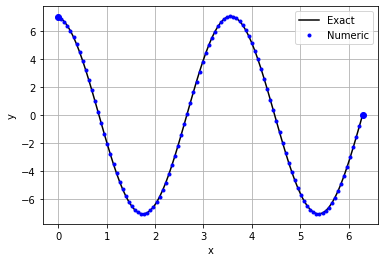

In [4]:
tol = 1e-6
max_iters = 100
low = -10
high = 10
count = 0

while count <= max_iters:
    count = count + 1
    xspan = (x[0], x[-1])
    
    #  Use the midpoint between high and low as our guess
    yprime0 = np.mean([low, high])
    
    #  Set the initial condition vector to be passed into the solver
    y0 = [7, yprime0 ]

    # Solve the system using our guess
    sol = solve_ivp(equations, xspan, y0, t_eval = x)

    #  For ease of use, extract the function values from the solution object.
    y_num = sol.y[0, :]

    #  Check to see if we within our desire tolerance
    if np.abs(y_num[-1]) <= tol:
        break
    
    #  Adjust our bounds if we are not within tolerance
    if y_num[-1] < 0:
        high = yprime0
    else:
        low = yprime0
        
    #print(count, y_num[-1])
    
#  Plot the solution and compare it to the analytical form defined above
plt.plot(x, y_exact, 'k', label='Exact')
plt.plot(x, y_num, 'b.', label='Numeric')
plt.plot([0, 2*np.pi], [7,0], 'bo')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()